<a href="https://www.kaggle.com/code/bhavinmoriya/stock-index-analysis-2?scriptVersionId=110823474" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt, timedelta as td
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
sns.set()
import pandas_datareader as web
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-dow-jones-pg-stock-data/365DSc-Indices-2000-2021.csv


In [2]:
df = pd.read_csv('../input/sp-500-dow-jones-pg-stock-data/365DSc-Indices-2000-2021.csv', 
                 index_col='Date')
df

,^GSPC,^IXIC,^DJI
Date,,,
2000-01-03,1455.219971,4131.149902,11357.509766
2000-01-04,1399.420044,3901.689941,10997.929688
2000-01-05,1402.109985,3877.540039,11122.650391
2000-01-06,1403.449951,3727.129883,11253.259766
2000-01-07,1441.469971,3882.620117,11522.559570
...,...,...,...
2021-05-17,4163.290039,13379.049805,34327.789062
2021-05-18,4127.830078,13303.639648,34060.660156
2021-05-19,4115.680176,13299.740234,33896.039062


<AxesSubplot:xlabel='Date'>

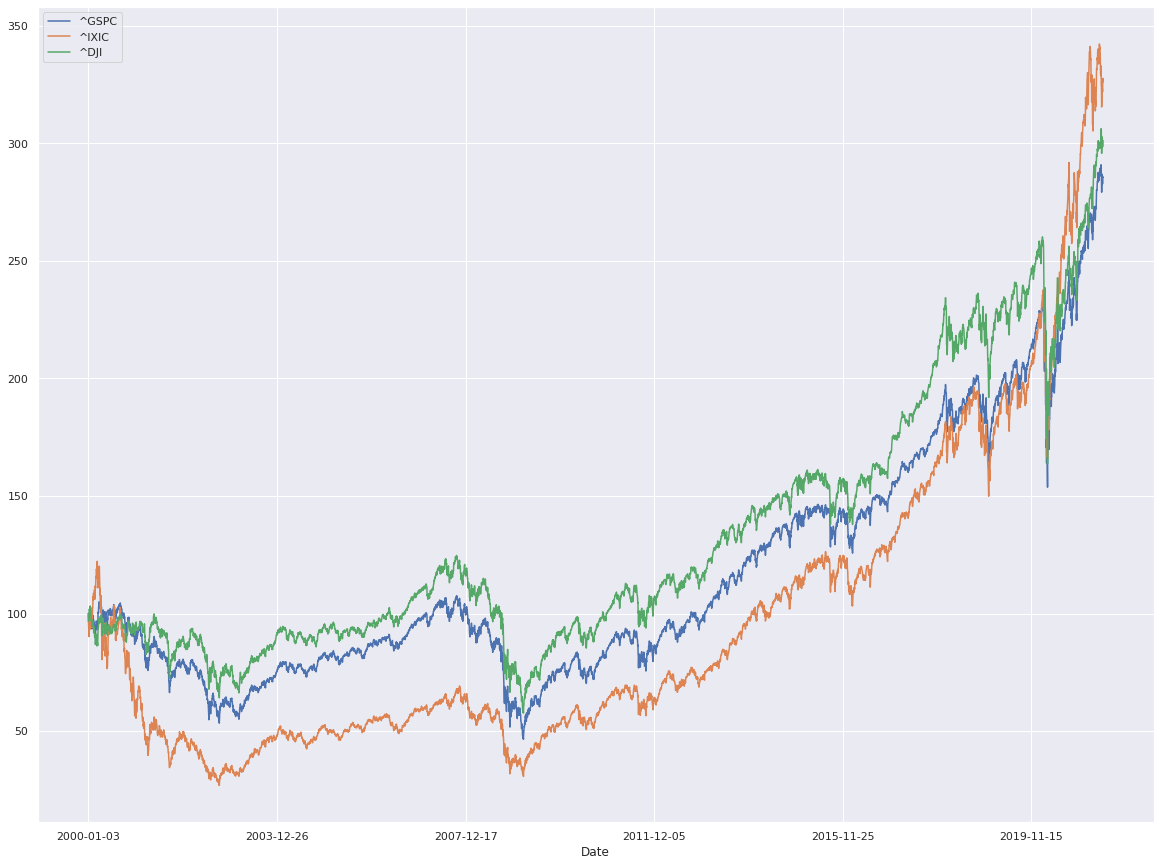

In [3]:
# normalize to 100

norm_df = (df * 100 / df.iloc[0])
norm_df.plot(figsize=(20,15))

NASDAQ is leading.

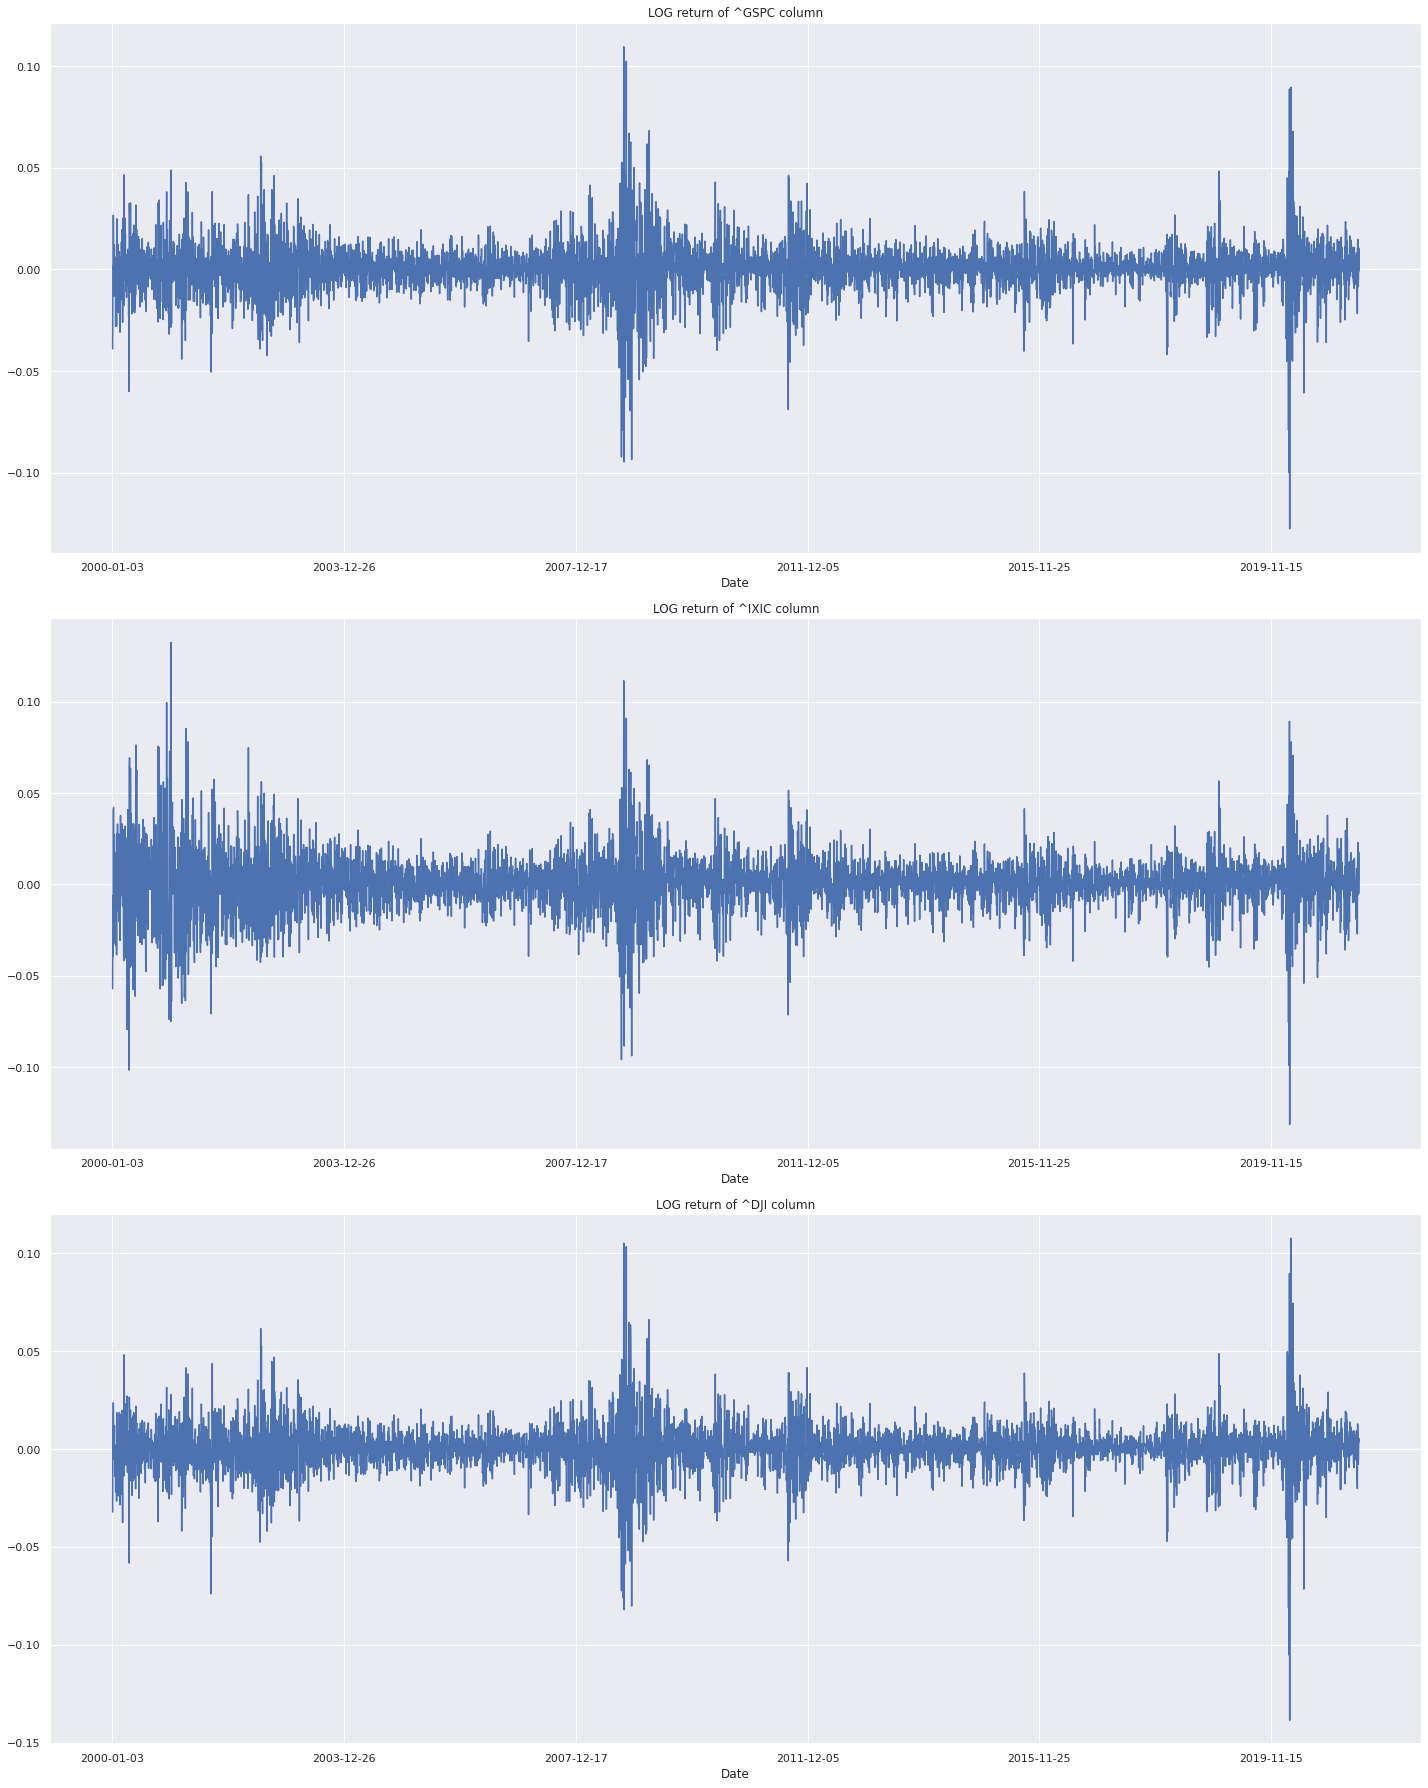

In [4]:
df_return = np.log(df / df.shift())
fig, ax = plt.subplots(3,1, figsize=(20,25))
ax = ax.flatten()
for i, c in enumerate(df.columns):
    df_return[c].plot(ax=ax[i])
#     print(i,c)
    ax[i].set_title(f'LOG return of {c} column')
    plt.tight_layout()

NASDAQ is leading.

In [5]:
# Divesifying risk = portfolio risk - (weighted annual risk)

weights = np.random.random(3)
weights /= sum(weights)

port_var = (weights.dot(df_return.cov() * 250)).dot(weights)
port_risk = port_var ** .5
port_risk

0.2037921785352933

# Risk of investment

There are two types :
1. Diversifiable (Unsystematic or Ideosyncratic) Company specified, which could be removed diversifying
2. Undiversifiable 
    - War
    - Economic crisis (eg. Recession)
    - Forces of nature
    - Low consumer spending

In [6]:
annual_var = (df_return.var() * 250).dot(weights ** 2)

In [7]:
div_risk = port_risk - annual_var
undiv_risk = port_risk - div_risk

In [8]:
print(f'Diversified and Undiversified risks are : {div_risk, undiv_risk}, respectively.')

Diversified and Undiversified risks are : (0.18872809885138933, 0.01506407968390397), respectively.
